In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [3]:
# load dataset
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
# subset dataset for west coast
ds_sst_loc = ds.analysed_sst.sel(lat=slice(35, 45), lon=slice(-130, -120))

# get avg climatology for 2002-2012
ref_sst = ds_sst_loc.sel(time=slice("2002-01", "2012-12")).mean()
ref_sst

<xarray.DataArray 'analysed_sst' ()>
array(287.07602, dtype=float32)

In [42]:
# get sst stdev between 2002 and 2012
ref_sst_std = ds_sst_loc.sel(time=slice("2002-01", "2012-12")).std("time")
print(ref_sst_std.min(), ref_sst_std.max())
ref_sst_std

<xarray.DataArray 'analysed_sst' ()>
array(1.248852, dtype=float32) <xarray.DataArray 'analysed_sst' ()>
array(3.2427723, dtype=float32)


<xarray.DataArray 'analysed_sst' (lat: 167, lon: 167)>
array([[2.1389308, 2.1354287, 2.1338828, ...,       nan,       nan,
              nan],
       [2.1375268, 2.1377196, 2.134783 , ...,       nan,       nan,
              nan],
       [2.134656 , 2.1342168, 2.1303525, ...,       nan,       nan,
              nan],
       ...,
       [3.0511901, 3.055246 , 3.0596726, ...,       nan,       nan,
              nan],
       [3.0519376, 3.055465 , 3.0564735, ...,       nan,       nan,
              nan],
       [3.0555851, 3.0567126, 3.05867  , ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 35.04 35.1 35.16 35.22 ... 44.82 44.88 44.94 45.0
  * lon      (lon) float32 -130.0 -129.9 -129.8 -129.8 ... -120.1 -120.1 -120.0

In [35]:
# get dataset for fig1 timeframe (2014-2016)
ds_fig1 = ds_sst_loc#.sel(time=slice("2014-01", "2016-09"))
# subtract 2002-2012 average
ds_fig1_norm = ds_fig1 - ref_sst

# get length of coordinate directions
_, n_lat, n_lon = ds_fig1_norm.shape



In [41]:
# ds for 2014-01
ds_fig1_14_1 = ds_fig1_norm.sel(time=slice("2014-01")).mean("time")
print(ds_fig1_14_1.min(), ds_fig1_14_1.max())
ds_fig1_14_1


<xarray.DataArray 'analysed_sst' ()>
array(-3.9104233, dtype=float32) <xarray.DataArray 'analysed_sst' ()>
array(2.9046662, dtype=float32)


<xarray.DataArray 'analysed_sst' (lat: 167, lon: 167)>
array([[ 2.9046662,  2.8913388,  2.881739 , ...,        nan,        nan,
               nan],
       [ 2.8784966,  2.8654227,  2.855565 , ...,        nan,        nan,
               nan],
       [ 2.852805 ,  2.842699 ,  2.8313923, ...,        nan,        nan,
               nan],
       ...,
       [-1.1096405, -1.1018132, -1.0949807, ...,        nan,        nan,
               nan],
       [-1.1383535, -1.1287159, -1.1180056, ...,        nan,        nan,
               nan],
       [-1.1662198, -1.1548917, -1.1446601, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 35.04 35.1 35.16 35.22 ... 44.82 44.88 44.94 45.0
  * lon      (lon) float32 -130.0 -129.9 -129.8 -129.8 ... -120.1 -120.1 -120.0

In [29]:
# compare with std, set to 0 if less than 1 std
for i in range(n_lat):
    for j in range(n_lon):
        if (abs(ds_fig1_14_1[i, j]) < ref_sst_std[i, j]).data:
            ds_fig1_14_1[i, j] = 0

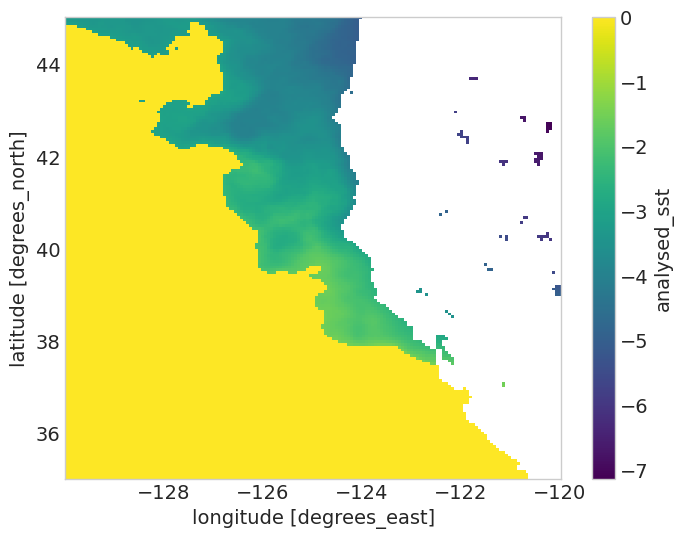

In [31]:
ds_fig1_14_1.plot()